Use the S1.txt data file and plot the datapoints. Split the dataset into train and test set. Implement KNN algorithm on your own and classify the datapoints and then use sklearn's KNN to compare

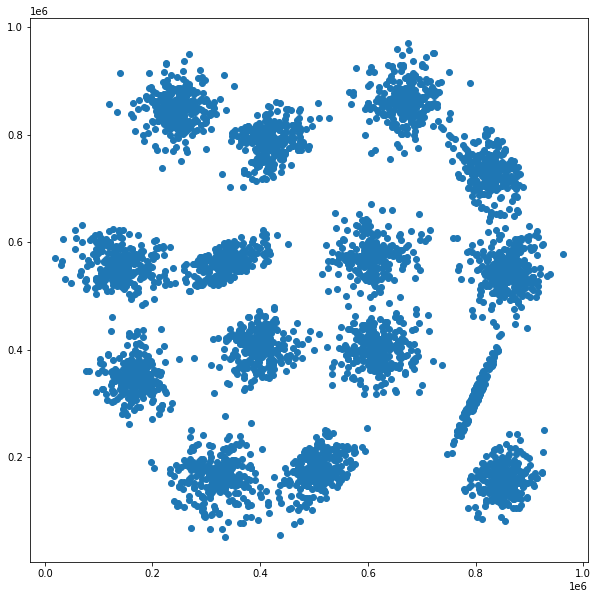

In [167]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

data = []
labels = []
X = []
Y = []

from google.colab import files
uploaded = files.upload() 

for line in open('S1.txt'):
    line = line.rstrip().strip()
    datapoint = [int(i) for i in line.split()]
    X.append(datapoint[0])
    Y.append(datapoint[1])
    data.append(datapoint)

from google.colab import files
uploaded = files.upload()

for line in open('S1-labels.pa'):
    label = line.rstrip()
    labels.append(int(label))

#print(len(data))
#print(data)
#print(labels)
#print(X)
#print(Y)
plt.figure(figsize=(10,10))
plt.scatter(X,Y)
plt.show()
#print(X)
#print(Y)

In [168]:
x_train, x_test, y_train, y_test = train_test_split(data,labels,test_size=0.2)
print(x_train)
print(y_train)
print(x_test)
print(y_test)

[[312421, 170617], [796609, 319691], [322789, 137560], [392428, 402295], [860870, 546516], [327998, 571265], [801751, 318110], [839757, 190518], [417393, 771537], [321556, 163352], [877298, 565604], [797594, 302109], [340693, 569371], [402071, 427626], [575022, 213534], [843111, 581603], [659734, 844127], [699668, 863774], [589994, 610890], [456799, 844976], [486034, 196122], [344239, 530765], [411488, 837715], [833499, 504718], [840100, 728839], [662249, 918050], [923996, 594948], [283474, 532727], [246470, 842932], [389713, 772742], [264175, 824349], [512900, 219252], [434717, 808225], [385140, 796221], [239344, 814789], [253899, 862843], [811502, 355939], [601619, 825604], [441950, 785934], [615934, 426539], [826192, 577784], [624328, 392133], [474648, 778810], [567188, 560044], [304376, 222294], [828276, 762021], [125675, 360158], [610263, 574422], [820327, 352701], [243941, 843256], [142000, 554964], [630384, 376295], [228611, 836717], [847423, 161535], [197463, 378513], [832154, 

In [169]:
from math import sqrt

train_data = x_train

for i in range(len(train_data)):
  train_data[i].append(y_train[i])

#print(train_data)

#print(x_train[0])
#print(y_train[0])

test_data = x_test

for i in range(len(test_data)):
  test_data[i].append(y_test[i])

#print(test_data)

def euclidean_distance(v1,v2):
  ED = 0
  for i in range(2):
    ED = ED + (v1[i]-v2[i])**2
  return sqrt(ED)

#print(euclidean_distance([67,88],[33,90]))

def neighbors(train_data, test, n):
  distances = []
  for train_row in train_data:
    distance = euclidean_distance(train_row,test)
    distances.append((train_row,distance))
  distances.sort(key=lambda tup:tup[1])
  neighbors_list = []
  for i in range(n):
    neighbors_list.append(distances[i][0])
  return neighbors_list

def predict_knn(train, test_row, n):
  neighbors_list = neighbors(train, test_row, n)
  return neighbors_list[0][2]

y_pred_own_knn = []

for i in test_data:
  predicted = predict_knn(train_data,i,3)
  y_pred_own_knn.append(predicted)

print(y_pred_own_knn)

from sklearn.metrics import accuracy_score
print("Accuracy of manual implementation of KNN is {} ".format(accuracy_score(y_test, y_pred_own_knn)))

[6, 6, 9, 1, 2, 1, 7, 15, 11, 7, 3, 11, 15, 14, 10, 2, 9, 4, 12, 4, 6, 11, 10, 9, 14, 13, 2, 4, 4, 7, 4, 13, 13, 8, 15, 6, 7, 4, 10, 12, 2, 7, 9, 15, 4, 8, 8, 3, 10, 11, 3, 3, 4, 14, 11, 9, 6, 6, 7, 5, 15, 2, 11, 11, 9, 3, 14, 11, 14, 12, 6, 9, 13, 12, 12, 13, 13, 2, 11, 14, 7, 13, 9, 14, 4, 7, 12, 14, 6, 13, 2, 6, 5, 11, 8, 4, 5, 15, 9, 14, 6, 1, 14, 3, 2, 7, 8, 1, 12, 14, 13, 12, 6, 1, 7, 8, 11, 7, 14, 12, 11, 10, 11, 10, 5, 15, 12, 3, 9, 7, 11, 10, 8, 5, 11, 9, 15, 7, 2, 12, 3, 12, 9, 5, 9, 13, 15, 5, 12, 15, 1, 14, 12, 2, 5, 8, 2, 7, 15, 8, 9, 7, 8, 13, 12, 14, 15, 4, 5, 11, 12, 13, 14, 7, 13, 4, 6, 1, 13, 9, 5, 13, 5, 10, 2, 7, 2, 7, 7, 5, 5, 3, 6, 5, 3, 11, 15, 9, 8, 14, 8, 3, 12, 5, 4, 5, 2, 9, 5, 6, 8, 13, 2, 15, 15, 13, 14, 13, 7, 7, 9, 5, 11, 6, 2, 14, 8, 12, 10, 8, 13, 14, 11, 9, 12, 15, 14, 4, 12, 10, 1, 3, 2, 4, 4, 11, 13, 1, 11, 14, 13, 9, 5, 6, 9, 3, 13, 12, 13, 15, 4, 3, 11, 15, 13, 6, 3, 3, 9, 7, 2, 6, 6, 11, 7, 15, 2, 9, 3, 9, 10, 5, 2, 14, 12, 15, 13, 12, 12, 10, 13,

In [170]:
# SKLEARN KNN 
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [171]:
#x_test = x_test.reshape(-1,1)

y_pred_sklearn = knn.predict(x_test)
print(y_pred_sklearn.tolist())

acc = accuracy_score(y_test, y_pred_sklearn)
print("Accuracy of Sklearn KNN Model is {}".format(acc))


[6, 6, 9, 1, 2, 1, 7, 15, 11, 7, 3, 11, 15, 14, 10, 2, 9, 4, 12, 4, 6, 11, 10, 9, 14, 13, 2, 4, 4, 7, 4, 13, 13, 8, 15, 6, 7, 4, 10, 12, 2, 7, 9, 15, 4, 8, 8, 3, 10, 6, 3, 3, 4, 14, 11, 9, 6, 6, 7, 5, 15, 2, 11, 11, 9, 3, 14, 11, 14, 12, 6, 9, 13, 12, 12, 13, 13, 2, 11, 14, 7, 13, 9, 14, 4, 7, 12, 14, 6, 13, 2, 6, 5, 11, 8, 4, 5, 15, 9, 14, 6, 1, 14, 3, 2, 7, 8, 1, 12, 14, 13, 12, 6, 1, 7, 8, 11, 7, 14, 12, 11, 10, 11, 10, 5, 15, 12, 3, 9, 7, 11, 10, 8, 5, 11, 9, 15, 8, 2, 12, 3, 12, 9, 5, 9, 13, 15, 5, 12, 15, 1, 14, 12, 2, 5, 8, 2, 7, 15, 8, 9, 7, 8, 13, 12, 14, 15, 4, 5, 11, 12, 13, 14, 7, 13, 4, 6, 1, 13, 9, 5, 13, 5, 10, 2, 13, 2, 7, 7, 5, 5, 3, 6, 5, 3, 11, 15, 9, 8, 14, 8, 3, 10, 5, 4, 5, 2, 9, 5, 6, 8, 13, 2, 15, 15, 13, 14, 13, 7, 7, 9, 5, 11, 6, 2, 14, 8, 12, 10, 1, 13, 14, 11, 9, 12, 15, 14, 4, 12, 10, 1, 3, 2, 4, 4, 11, 13, 1, 11, 14, 13, 9, 5, 6, 9, 3, 13, 12, 13, 15, 4, 3, 11, 15, 13, 6, 3, 3, 9, 7, 2, 6, 6, 11, 7, 15, 2, 9, 3, 9, 10, 5, 2, 14, 12, 15, 13, 12, 12, 10, 13,

Use S2.txt data file and plot the datapoints. Figure out the optimal clusters that can be formed and make clusters. Plot the datapoints and centroid.(Use both your own implementation and Sklearn's).

[[624474, 837604], [673412, 735362], [647442, 677000], [532283, 741384], [646529, 742844], [647535, 755101], [644131, 777721], [521368, 736923], [688940, 798967], [592666, 805244], [645068, 716248], [666740, 707391], [662064, 644958], [630628, 689662], [623268, 774834], [617896, 766560], [560260, 629298], [595728, 703618], [594177, 665266], [544862, 802997], [512102, 686369], [742244, 626859], [709853, 684304], [662854, 764737], [612693, 778368], [656011, 735274], [644769, 750956], [688852, 804551], [714271, 804144], [695472, 794296], [746441, 829147], [632975, 756806], [679779, 842107], [609763, 693428], [665375, 784377], [783661, 772895], [651521, 719802], [730159, 761390], [708303, 692097], [657201, 735978], [657676, 809387], [636976, 735247], [645990, 751430], [634257, 761114], [638687, 658319], [651406, 751827], [747619, 624316], [623835, 729538], [660357, 757474], [588712, 804321], [568583, 699863], [486170, 676920], [602196, 605901], [642237, 745490], [606020, 713186], [728084, 

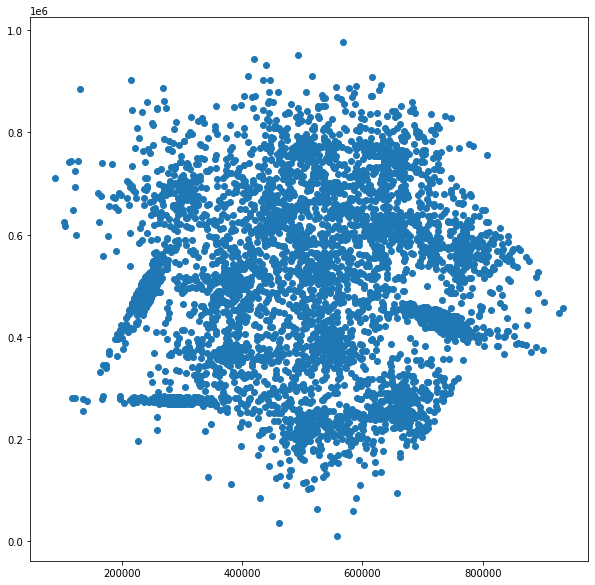

In [172]:
data = []

from google.colab import files
uploaded = files.upload() 

X = []
Y = []

for line in open('S2.txt'):
    line = line.rstrip().strip()
    datapoint = [int(i) for i in line.split()]
    X.append(datapoint[0])
    Y.append(datapoint[1])
    data.append(datapoint)
  
#print(len(data))
print(data)
plt.figure(figsize=(10,10))
plt.scatter(X,Y)
#print(X)
#print(Y)


Text(0, 0.5, 'WCSS')

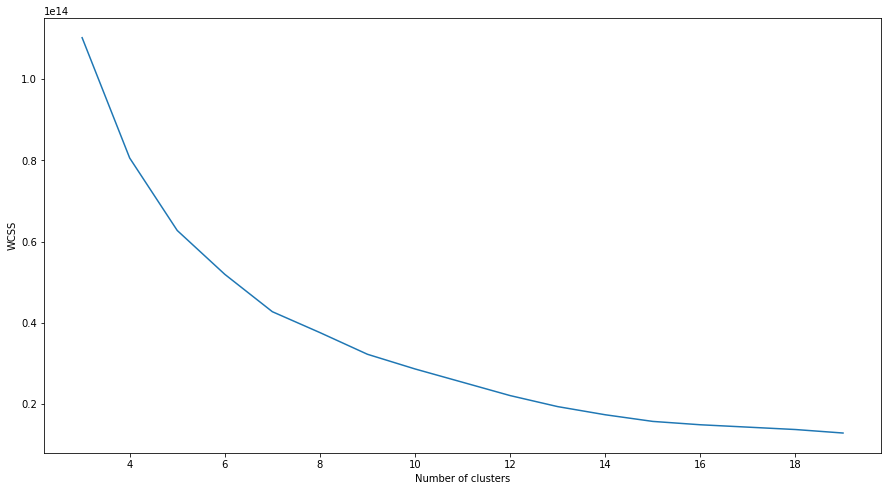

In [208]:
from sklearn.cluster import KMeans

wcss=[]

for i in range(3,20):
  kmeans = KMeans(i)
  kmeans.fit(data)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(3,20)
plt.figure(figsize=(15,8))
plt.plot(number_clusters,wcss)

plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

From the above plot we observe that elbow point is at 15 so the optimal number of clusters can be said to be 15

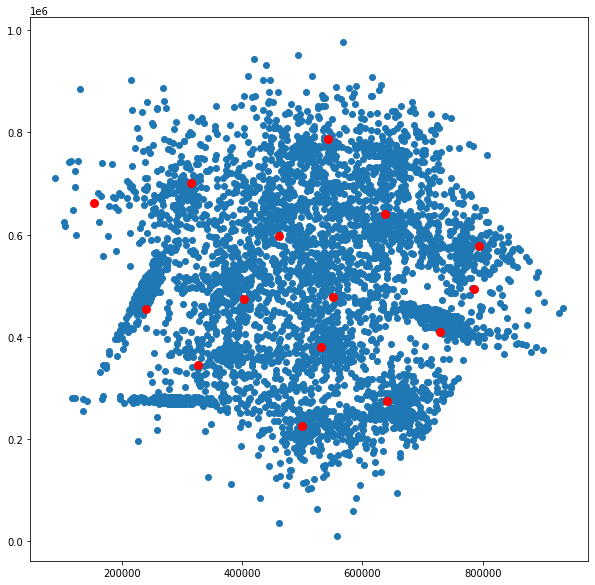

In [227]:
# manual implementation

data = np.array(data)
x_train, x_test = train_test_split(data,test_size=0.2)

class Own_K_Means:
    def __init__(self, k=15, max_iter=500):
        self.k = k
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]     #selecting random clusters

        for i in range(self.max_iter):
            self.cls = {}

            for i in range(self.k):
                self.cls[i] = []   

            for sample in data:
                distances = [] 
                for centroid in self.centroids:
                  temp = euclidean_distance(sample,self.centroids[centroid])
                  distances.append(temp) 
                min_dist = min(distances)
                classification = distances.index(min_dist)
                self.cls[classification].append(sample)

            prev_centroids = self.centroids

            for classification in self.cls:
                self.centroids[classification] = np.average(self.cls[classification],axis=0)

            stop = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                temp = (current_centroid-original_centroid)/original_centroid*100
                if np.sum(temp) > 0.001:
                    stop = False

            if stop:
                break

    def predict(self,data):
        distances = []
        for centroid in self.centroids:
                  temp = euclidean_distance(data,self.centroids[centroid])
                  distances.append(temp)
        classification = distances.index(min(distances))
        return classification

model = Own_K_Means()
model.fit(x_train)

"""y_pred_own_kmean = []
for i in x_test:
  y_pred_own_kmean.append(model.predict(i))
"""

plt.figure(figsize=(10,10))
plt.scatter(X,Y)  

for centroid in model.centroids:
    plt.scatter(model.centroids[centroid][0], model.centroids[centroid][1], color="red", linewidths=3)

plt.show()

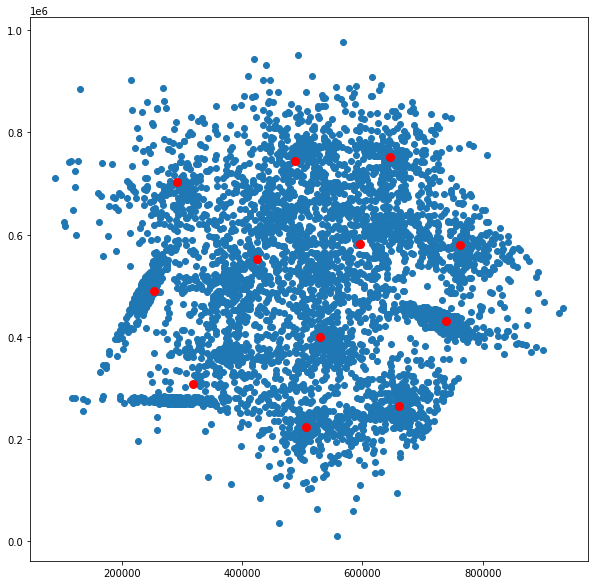

In [217]:
# sklearn implementation 

kmeans = KMeans(n_clusters=12)
kmeans.fit(data)
#y_pred_kmean = kmeans.predict(x_test)

centers = kmeans.cluster_centers_
plt.figure(figsize=(10,10))
plt.scatter(X,Y)
plt.scatter(centers[:, 0], centers[:, 1], c='red', linewidths=3)